In [20]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
from mlrefined_libraries import superlearn_library as superlearn
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
import matplotlib.pyplot as plt
from autograd.misc.flatten import flatten_func

# demos for this notebook
regress_plotter = superlearn.lin_regression_demos
optimizers = optlib.optimizers
normalizers = superlearn.normalizers 
static_plotter = optlib.static_plotter.Visualizer()
linear_datapath = '../../mlrefined_datasets/superlearn_datasets/'
nonlinear_datapath = '../../mlrefined_datasets/nonlinear_superlearn_datasets/'

# import autograd functionality to bulid function's properly for optimizers
import autograd.numpy as np

# import timer
from datetime import datetime 
import copy

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Linear

<IPython.core.display.Javascript object>


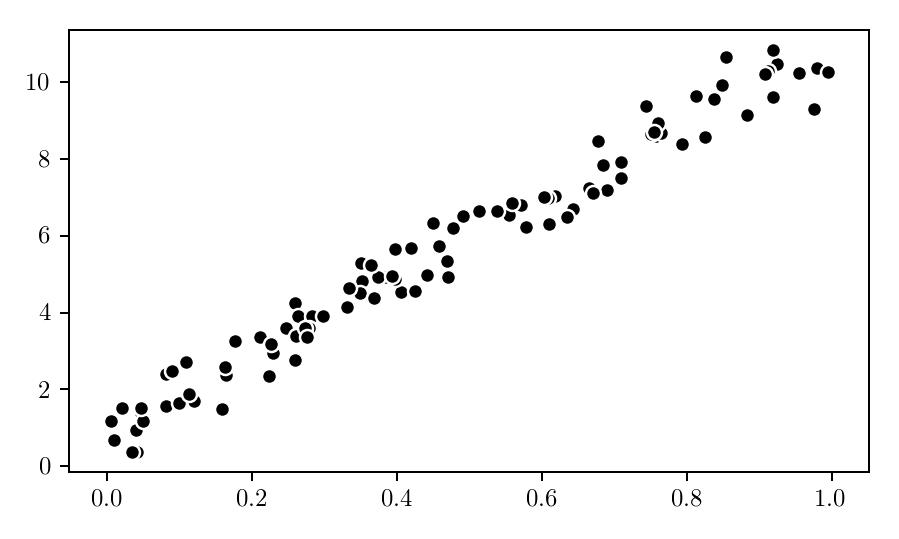

In [2]:
# load data
csvname = linear_datapath + 'unnorm_linregress_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:,:-1].T
y = data[:,-1:] 

# plot dataset
plt.figure(figsize = (5,3))
plt.scatter(x,y,color = 'k',edgecolor = 'w')
plt.show()

## Model and cost

In [3]:
# compute linear combination of input point
def model(x,w):
    # tack a 1 onto the top of each input point all at once
    o = np.ones((1,np.shape(x)[1]))
    x = np.vstack((o,x))
    
    # compute linear combination and return
    a = np.dot(x.T,w)
    return a

# an implementation of the least squares cost function for linear regression
def least_squares(w):
    cost = np.sum((model(x,w) - y)**2)
    return cost/float(len(y))

## Optimizer

In [4]:
# run gradient descent to minimize the Least Squares cost for linear regression
g = least_squares; w = 0. 1*np.random.randn(x.shape[0]+1,1); max_its = 100; alpha_choice = 10**(-1);
weight_history,cost_history = optimizers.gradient_descent(g,alpha_choice,max_its,w)

<IPython.core.display.Javascript object>


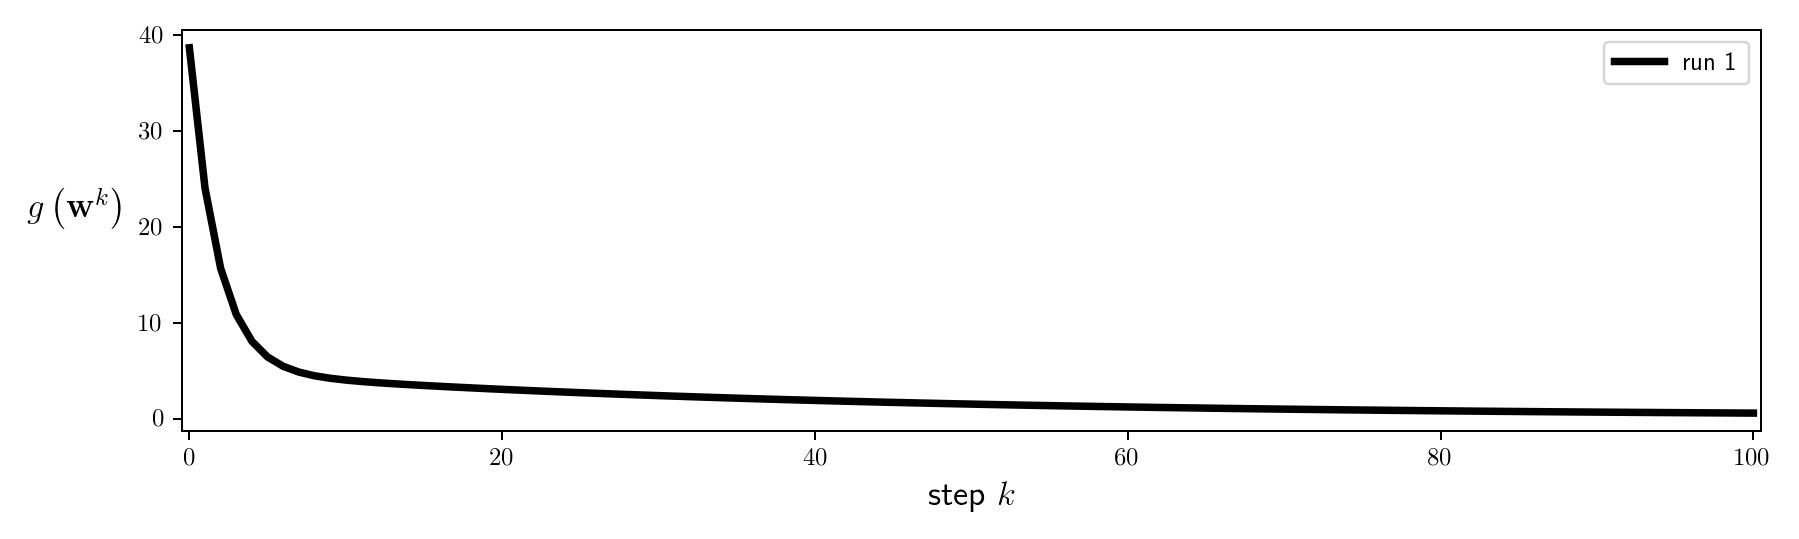

In [5]:
# plot the cost function history for a given run
static_plotter.plot_cost_histories([cost_history],start = 0,points = False,labels = ['run 1'])

In [171]:
def plot_model(x,y,w,model,**kwargs):
    # scatter plot the input data
    plt.figure(figsize = (5,3))
    plt.scatter(x,y,color = 'k',edgecolor = 'w')
    xmin = np.min(x); xmax = np.max(x); xgap = (xmax - xmin)*0.1;
    xmin -= xgap; xmax += xgap
    s = np.linspace(xmin,xmax,100)[np.newaxis,:]
    transformer = lambda data: data
    if 'transformer' in kwargs:
        transformer = kwargs['transformer']
    t = model(transformer(s),w)
    plt.plot(s.T,t,linewidth = 2.5,color = 'r')
    plt.show()

<IPython.core.display.Javascript object>


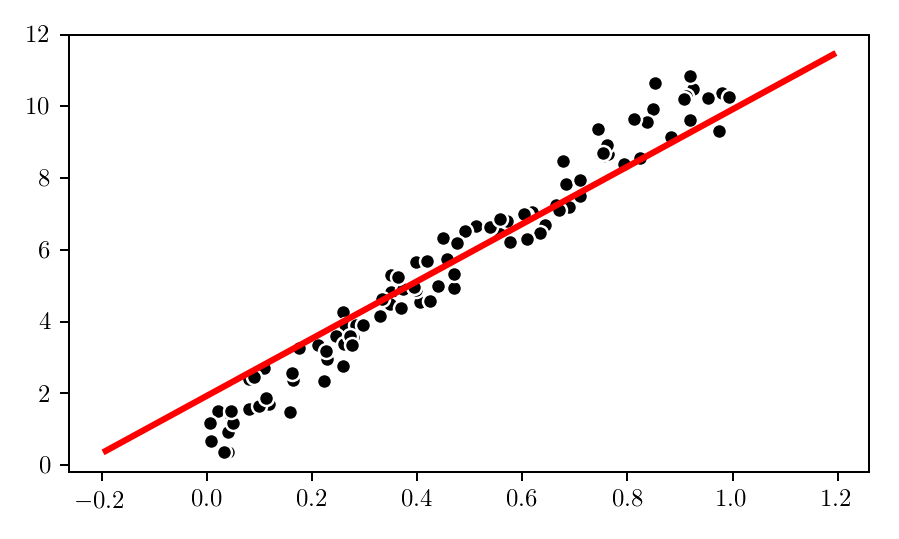

In [7]:
plot_model(x,y,weight_history[-1],model)